In [1]:
# Random Library Imports
import os,glob,sys,time
import json

# Importing Datetime Libraries
from datetime import datetime, timedelta

# CartoPy Map Plotting Libraires
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

# Matplotlib Plotting Libraries
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm, Normalize
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import patheffects

import geopandas as gp
import pandas as pd


In [2]:
os.chdir("../src")

In [3]:
# https://github.com/kelvins/US-Cities-Database
file = "us_cities.csv"

In [4]:
usa = pd.read_csv(file)

In [45]:
def get_city(usa):
    """
    
    """
    city = usa.sample()["CITY"]
    city = city.values[0]
    city_df = usa[usa["CITY"]==city]
    

    # run the sample again because there can be several states 
    # that have a shared city name
    city_df = city_df.sample()
    print(city_df)
    return city_df
    

https://www.nrcs.usda.gov/wps/portal/nrcs/detail/?cid=nrcs143_013696

In [47]:
city_df = get_city(usa)
state = city_df.STATE_CODE.values[0]
lat = city_df.LATITUDE.values[0]
lon = city_df.LONGITUDE.values[0]

      ID STATE_CODE STATE_NAME     CITY   COUNTY   LATITUDE  LONGITUDE
731  732         AL    Alabama  Stanton  Chilton  32.709631 -86.886848


In [8]:
shpfileList =  glob.glob(f"cb_2018_us_county_5m/cb_2018_us_county_5m.shp")

shpfile = shpfileList[0]
"""
 current_all.shp
x current_all.shx
x current_all.dbf
x current_all.cpg
x current_all.prj
"""
countySHP = gp.read_file(shpfile)
print("Shape of the dataframe: {}".format(countySHP.shape))
#print("Projection of dataframe: {}".format(usa.crs))
#usa #last 5 records in dataframe
countySHP.head()

Shape of the dataframe: (3233, 10)


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,39,071,01074048,0500000US39071,39071,Highland,06,1432479992,12194983,"POLYGON ((-83.86976 39.05553, -83.86568 39.247..."
1,06,003,01675840,0500000US06003,06003,Alpine,06,1912292630,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
2,12,033,00295737,0500000US12033,12033,Escambia,06,1701544502,563927612,"POLYGON ((-87.62999 30.87766, -87.62946 30.880..."
3,17,101,00424252,0500000US17101,17101,Lawrence,06,963936864,5077783,"POLYGON ((-87.91028 38.57493, -87.90811 38.850..."
4,28,153,00695797,0500000US28153,28153,Wayne,06,2099745573,7255476,"POLYGON ((-88.94317 31.78421, -88.94335 31.824..."


In [9]:
with open("state_codes.txt", "r") as fp:
    stateCodes = json.load(fp)

In [11]:
with open("state_abbrs.txt", "r") as fp:
    stateAbbs = json.load(fp)

In [48]:
code = stateCodes[stateAbbs.index(state)]
counties = countySHP[countySHP["STATEFP"]==code]

In [38]:
def get_state_index(state,extents,set_extent):
    index = stateAbbs.index(state)
    extents[index] = set_extent
    return extents

In [41]:
extents2 = get_state_index(state,extents,[-75,-68,40.4,44])
extent = extents2[stateAbbs.index(state)]

In [50]:
extent = extents[stateAbbs.index(state)]
extent

[-89, -84.5, 30.0, 35.5]

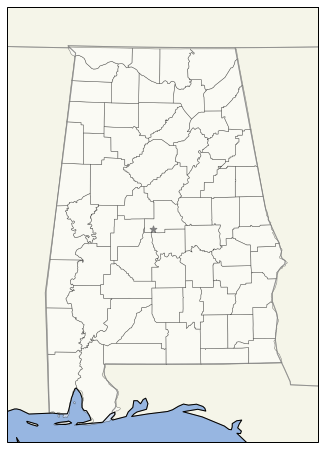

In [51]:
# Set Projection of Data
datacrs = ccrs.PlateCarree()

# Set Projection of Plot
plotcrs = ccrs.LambertConformal(central_longitude=lon)    

# Change the DPI of the resulting figure. Higher DPI drastically improves the
# look of the text rendering
plt.rcParams['savefig.dpi'] = 255

# Create the figure and an axes set to the projection
#    fig = plt.figure(figsize=(40, 20))
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=plotcrs)


state_boundaries = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='110m', facecolor='none')
    # Add some various map elements to the plot to make it recognizable
ocean = cfeature.NaturalEarthFeature(category='physical', scale='50m', name='ocean', facecolor=cfeature.COLORS['water'])
coast = cfeature.NaturalEarthFeature(category='physical', scale='50m', facecolor='none', name='coastline')
state_borders = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='none') 
land = cfeature.NaturalEarthFeature(category='physical', scale='50m', name='land', facecolor=cfeature.COLORS['land'])

#ax.add_feature(USCOUNTIES.with_scale("500k"),linewidth=0.5,alpha=0.5)

#ax.add_geometries(pa_counties["geometry"],crs=ccrs.PlateCarree(),
#                  edgecolor="k",alpha=0.5,facecolor="w",linewidth=0.5)

#ax.add_geometries(nj_counties["geometry"],crs=ccrs.PlateCarree(),
#                  edgecolor="k",alpha=0.5,facecolor="w",linewidth=0.5)

ax.add_geometries(counties["geometry"],crs=ccrs.PlateCarree(),
                  edgecolor="k",alpha=0.5,facecolor="w",linewidth=0.5)


#from metpy.plots import USCOUNTIES
#ax.add_feature(COUNTIES, facecolor='none', edgecolor='gray')
ax.add_feature(ocean, zorder=-1)
ax.add_feature(land, zorder=-1,alpha=0.6)
ax.add_feature(state_borders, edgecolor='gray',alpha=0.6)
ax.add_feature(coast, edgecolor='black')
ax.scatter(-104.9903, 39.7392, marker='*', c="w",transform=datacrs,s=105) # Denver
#ax.scatter(-105.2705, 40.0150, marker='*', c="blue",transform=datacrs,s=205) # Boulder
ax.scatter(-105.0844, 40.5853, marker='o', c="blue",transform=datacrs,s=30) # Ft Collins
#transform = datacrs._as_mpl_transform(ax)


ax.scatter(lon, lat, marker='*', c="k",transform=datacrs,s=50) # forecast city


#ax.annotate('Denver', xy=(-106, 38.8), xycoords=transform)#,ha='right', va='top')    
# Reduce point density so that there's only one point within a 1km circle
#mask = reduce_point_density(xy, 50000)
 
# Set plot bounds to Africa
ax.set_extent(extent)

outline_effect = [patheffects.withStroke(linewidth=0.5, foreground='black')]

# Set the plot title    
#plt.title(title,loc='left',fontdict=font)
#plt.title(title_date,loc='right',fontdict=font)


outfile = f"random_city_plot.png"
#fig.savefig(outfile,bbox_inches='tight',dpi=120)

In [30]:
extent = [-75,-68,40.4,44]

In [52]:
extent

[-89, -84.5, 30.0, 35.5]